<a href="https://colab.research.google.com/github/satishgunjal/Machine-Learning-Using-Python/blob/master/08_Logistic_Regression_Binary_Classification/Logistic_Regression_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Logistic Regression (Multiclass Classification)

1. For classification problem we use Logistic Regression
2. Binary classficiation: When outcome has only two categories. (yea/no, 0/1, buy/not buy) e.g. Predicting whether customer will buy insurance policy
3. Multiclass classification: When outcome has more than two categoirs. e.g Which party a person is going to vote for (BJP, Congres, AAP)

**Problem Statement:Predicting handwritten digits using Multiclass logistic regression**

* We are using handwritten digits dataset from sklearn.datasets
* This dataset is made up of 1797, 8x8 images.
* Each image contain one handwritten digit
* In order to use 8x8 fugure/image we will transform it into feature vector of size 64.

[Reference](https://youtu.be/J5bXOOmkopc)

Import required classes

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

Load the digits dataset

In [0]:
digits = load_digits()

Structure of digits dataset is as below

In [43]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

'data'  > Contains the feature vector of size 64 for given number

'image' > 8x8 image of the digit

'target'> Digit value

Lets plot the first 5 images from dataset


target value of image 0 is 0
target value of image 1 is 1
target value of image 2 is 2
target value of image 3 is 3
target value of image 4 is 4


<Figure size 432x288 with 0 Axes>

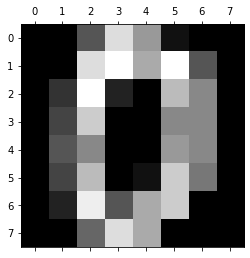

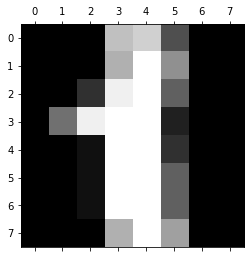

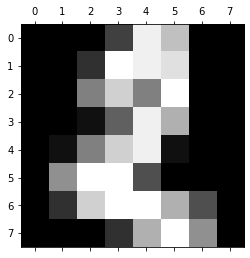

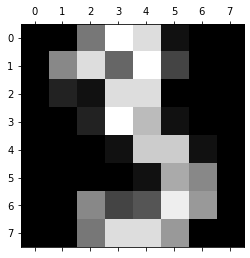

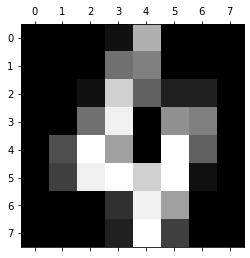

In [44]:
plt.gray()

for i in range(5):
  plt.matshow(digits.images[i])
  print("target value of image %s is %s" % (i, digits.target[i]))

Now lets split the dataset into training and test data

In [55]:
from sklearn.model_selection import train_test_split # importing the class train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

# Notice here we are using digits.data because it contains the feature vector(64) for each image
print("len of X_train is %s" % (len(X_train)))
print("len of X_test is %s" % (len(X_test)))
print("len of y_train is %s" % (len(y_train)))
print("len of y_test is %s" % (len(y_test)))

len of X_train is 1437
len of X_test is 360
len of y_train is 1437
len of y_test is 360


Now lets train the Regression model

In [0]:
from sklearn.linear_model import LogisticRegression # import LogisticRegression class

# model = LogisticRegression() # create classifierm of the class

#Above code didnot worked for me so i am using below parameters

model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Check the accuracy of the model

In [58]:
model.score(X_test, y_test)

0.9694444444444444

## Testing the Model

**Q1: Predict the value of 100th digit from dataset**

In [60]:
model.predict([digits.data[100]]) 
#note here 'digits.data[100]' is single dimentional array and since input must be 2 dimentional array we enclosed it in '[ ]' brackets

array([4])

Since our model predicted the value of 100th digit from dataset as 4, lets verify it using 'target' value from dataset

In [62]:
digits.target[100]

4

**Q2: Lets predict the first 5 images values**

In [68]:
model.predict(digits.data[0:5])
#note here 'digits.data[0:5]' is two dimentional array

array([0, 1, 2, 3, 4])

lets verify it using 'target' values

In [69]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

## To visualize the inner working of the model we use Congusion Matrix

In [0]:
y_predicted =model.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix # import confusion matrix class

cm = confusion_matrix(y_test,y_predicted) # create classifier of confussion_matrix
cm # it is two dimentional array

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  0,  1],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 30,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 31]])

For better visualization of aray we are going to use seaborn library

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(69.0, 0.5, 'Truth')

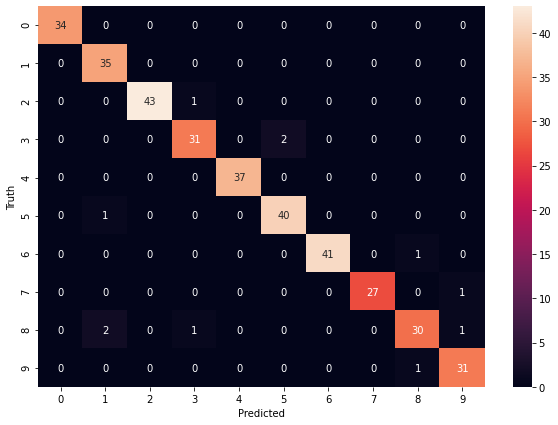

In [77]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In above matrix X axis contains predicted values, and Y axis contains actual values. Each value of matrix show the number of times predicted value matched with actual value.